In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [112]:
url = 'https://raw.githubusercontent.com/afiqilyasakmal/european-investment-management/main/data/european-investment-management-train.csv'
df = pd.read_csv(url)

# 1. Return dana investasi per tahun dari 2015-2020

In [113]:
fund_return_columns = ['fund_return_2015_q1', 'fund_return_2015_q2', 'fund_return_2015_q3',
                        'fund_return_2015_q4', 'fund_return_2016_q1', 'fund_return_2016_q2',
                        'fund_return_2016_q3', 'fund_return_2016_q4', 'fund_return_2017_q1',
                        'fund_return_2017_q2', 'fund_return_2017_q3', 'fund_return_2017_q4',
                        'fund_return_2018_q1', 'fund_return_2018_q2', 'fund_return_2018_q3',
                        'fund_return_2018_q4', 'fund_return_2019_q1', 'fund_return_2019_q2',
                        'fund_return_2019_q3', 'fund_return_2019_q4', 'fund_return_2020_q1',
                        'fund_return_2020_q2', 'fund_return_2020_q3']

selected_columns = ['ticker', 'category', 'roe', 'roic', 'roa'] + fund_return_columns

# Buat DataFrame yang hanya berisi kolom-kolom terpilih
df_a = df[selected_columns]

# Hapus baris yang mengandung nilai-nilai yang hilang
df_a_cleaned = df_a.dropna()

In [114]:
df_a.shape

(22420, 28)

In [115]:
df_a_cleaned.shape

(15559, 28)

In [116]:
# Urutkan DataFrame berdasarkan roic, roe, dan roi secara berurutan
df_a_sorted = df_a_cleaned.sort_values(by=['roe', 'roic', 'roa'], ascending=[True, True, True])

df_a_sorted

,ticker,category,roe,roic,roa,fund_return_2015_q1,fund_return_2015_q2,fund_return_2015_q3,fund_return_2015_q4,fund_return_2016_q1,...,fund_return_2018_q2,fund_return_2018_q3,fund_return_2018_q4,fund_return_2019_q1,fund_return_2019_q2,fund_return_2019_q3,fund_return_2019_q4,fund_return_2020_q1,fund_return_2020_q2,fund_return_2020_q3
1856,F00000LLF8,Convertible Bond - Europe,-29.36,-9.39,-2.98,-1.21,-3.20,0.56,0.94,3.78,...,0.40,0.14,-4.25,-1.19,5.68,-0.88,-3.12,-4.32,8.82,3.78
7764,F00000H56A,Convertible Bond - Europe,-29.36,-9.39,-2.98,-1.22,-3.20,0.56,0.94,3.78,...,0.37,0.14,-4.27,-1.18,5.67,-0.88,-3.12,-4.33,8.82,3.77
7916,F00000OYMN,Convertible Bond - Europe,-29.36,-9.39,-2.98,-1.10,-3.08,0.69,1.08,3.90,...,0.49,0.27,-4.15,-1.06,5.80,-0.76,-3.00,-4.19,8.94,3.90
11215,F00000U5FJ,Convertible Bond - Europe,-29.36,-9.39,-2.98,-1.14,-3.14,0.64,1.01,3.84,...,0.44,0.21,-4.19,-1.11,5.75,-0.80,-3.05,-4.25,8.92,3.88
15120,F00000TR10,Convertible Bond - Europe,-29.36,-9.39,-2.98,-1.13,-3.14,0.64,1.02,3.85,...,0.44,0.21,-4.19,-1.11,5.75,-0.81,-3.05,-4.25,8.92,3.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,F0GBR04S11,US Large-Cap Blend Equity,39.50,21.91,16.55,7.30,-6.72,-5.92,6.96,5.02,...,11.12,6.47,-9.21,13.02,6.86,4.96,-0.60,-7.78,19.40,1.87
2277,0P0000N98C,Sector Equity Technology,43.45,22.94,14.60,4.46,-5.79,-0.83,13.35,5.58,...,14.38,9.31,-15.05,16.48,8.54,6.82,5.95,-2.98,26.04,7.89
2547,0P0000YZ0Y,Sector Equity Technology,43.45,22.94,14.60,5.02,-6.03,-0.81,12.66,5.93,...,14.44,9.20,-15.41,17.13,8.61,6.90,6.17,-4.51,27.24,8.08
4229,0P0000X05R,Sector Equity Technology,43.45,22.94,14.60,3.81,-5.74,-1.49,14.87,4.72,...,13.44,10.20,-16.10,18.13,8.73,6.06,6.40,-2.57,23.95,9.04


In [117]:
# Pilih data untuk ditampilkan secara manual
max_row = df_a_sorted.iloc[-1]
q3_row = df_a_sorted.iloc[3890]
median_row = df_a_sorted.iloc[7780]
q1_row = df_a_sorted.iloc[11669]
min_row = df_a_sorted.iloc[0]

# Tampilkan kategori dari baris terpilih
category_max = max_row['category']
category_q1 = q1_row['category']
category_median = median_row['category']
category_q3 = q3_row['category']
category_min = min_row['category']

print(f"Category: {category_max}")
print(f"Category: {category_q1}")
print(f"Category: {category_median}")
print(f"Category: {category_q3}")
print(f"Category: {category_min}")

Category: Sector Equity Technology
Category: GBP Moderate Allocation
Category: USD Moderate Allocation
Category: Asia ex-Japan Equity
Category: Convertible Bond - Europe


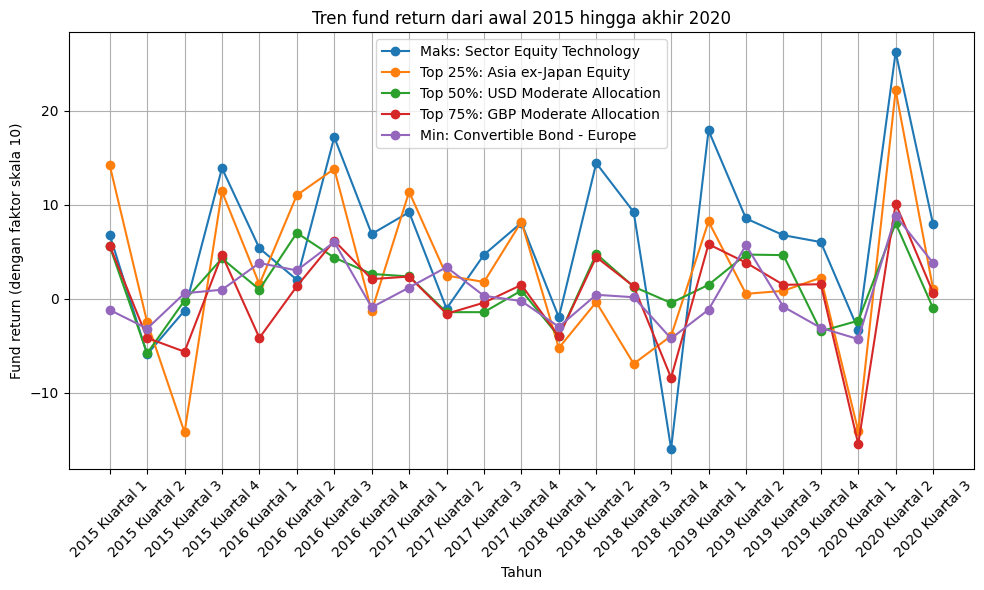

In [118]:
# Mengambil history fund return dari masing-masing baris
max_history_fund_return = max_row[fund_return_columns]
q1_history_fund_return = q1_row[fund_return_columns]
median_history_fund_return = median_row[fund_return_columns]
q3_history_fund_return = q3_row[fund_return_columns]
min_history_fund_return = min_row[fund_return_columns]

# Membuat label sumbu x berdasarkan tahun dan kuartal
quarters = ['2015 Kuartal 1', '2015 Kuartal 2', '2015 Kuartal 3', '2015 Kuartal 4', '2016 Kuartal 1', '2016 Kuartal 2', '2016 Kuartal 3', '2016 Kuartal 4',
            '2017 Kuartal 1', '2017 Kuartal 2', '2017 Kuartal 3', '2017 Kuartal 4', '2018 Kuartal 1', '2018 Kuartal 2', '2018 Kuartal 3', '2018 Kuartal 4',
            '2019 Kuartal 1', '2019 Kuartal 2', '2019 Kuartal 3', '2019 Kuartal 4', '2020 Kuartal 1', '2020 Kuartal 2', '2020 Kuartal 3']

# Plot history fund return
plt.figure(figsize=(10, 6))

# Plot data history fund return untuk masing-masing kategori
plt.plot(quarters, max_history_fund_return, marker='o', linestyle='-', label=f'Maks: {category_max}')
plt.plot(quarters, q3_history_fund_return, marker='o', linestyle='-', label=f'Top 25%: {category_q3}')
plt.plot(quarters, median_history_fund_return, marker='o', linestyle='-', label=f'Top 50%: {category_median}')
plt.plot(quarters, q1_history_fund_return, marker='o', linestyle='-', label=f'Top 75%: {category_q1}')
plt.plot(quarters, min_history_fund_return, marker='o', linestyle='-', label=f'Min: {category_min}')

# Tambahkan legenda
plt.legend()

# Atur label dan judul
plt.title("Tren fund return dari awal 2015 hingga akhir 2020")
plt.xlabel("Tahun")
plt.ylabel("Fund return (dengan faktor skala 10)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Tampilkan plot
plt.show()

# 2. Top 20 kategori manajemen investasi berdasarkan dana kelolaan

In [119]:
# Buat DataFrame untuk menampung fitur yang diperlukan
df_b = df.copy()
kolom_tujuan_b = ['ticker','category','fund_size','fund_size_currency']
df_b = df_b[kolom_tujuan_b]
df_b

,ticker,category,fund_size,fund_size_currency
0,0P000153IG,Global Flex-Cap Equity,6.566210e+09,NOK
1,F00000OUR6,US Mid-Cap Equity,7.717900e+08,USD
2,F00000OTTT,Asia-Pacific ex-Japan Equity,1.282800e+08,GBP
3,F000005K32,US Large-Cap Blend Equity,2.974600e+08,USD
4,F00000ZCZC,Europe Mid-Cap Equity,1.880000e+07,EUR
...,...,...,...,...
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,1.894400e+08,GBP
22416,F000002K4M,UK Equity Income,5.716000e+07,GBP
22417,F00000PGHH,Global Large-Cap Blend Equity,7.452200e+08,USD
22418,F00000QNV0,UK Small-Cap Equity,1.921700e+08,GBP


In [120]:
df_b['fund_size_currency'].unique()

array(['NOK', 'USD', 'GBP', 'EUR', nan, 'CHF', 'JPY', 'CAD', 'HKD', 'SEK',
       'AUD', 'SGD', 'DKK', 'CNH'], dtype=object)

In [121]:
# Check missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df_b)

                    Total   Percent
fund_size             357  1.592328
fund_size_currency    357  1.592328


In [122]:
# Drop missing value karena jumlahnya sedikit
df_b.dropna(inplace=True)
cek_null(df_b)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [123]:
# Membuat kolom baru "fund_size_usd" dengan mengonversi ke USD (Data 1 November 2023)
# Nilai tukar ke usd
exchange_rates = {
    'NOK': 0.089,
    'USD': 1.0,
    'GBP': 1.21,
    'EUR': 1.06,
    'CHF': 1.11,
    'JPY': 0.0067,
    'CAD': 0.72,
    'HKD': 0.13,
    'SEK': 0.089,
    'AUD': 0.63,
    'SGD': 0.73,
    'DKK': 0.14,
    'CNH': 0.14
}

df_b.loc[df_b.index, 'fund_size_usd'] = df_b.apply(lambda row: row['fund_size'] * exchange_rates[row['fund_size_currency']], axis=1)

df_b

,ticker,category,fund_size,fund_size_currency,fund_size_usd
0,0P000153IG,Global Flex-Cap Equity,6.566210e+09,NOK,584392690.0
1,F00000OUR6,US Mid-Cap Equity,7.717900e+08,USD,771790000.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,1.282800e+08,GBP,155218800.0
3,F000005K32,US Large-Cap Blend Equity,2.974600e+08,USD,297460000.0
4,F00000ZCZC,Europe Mid-Cap Equity,1.880000e+07,EUR,19928000.0
...,...,...,...,...,...
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,1.894400e+08,GBP,229222400.0
22416,F000002K4M,UK Equity Income,5.716000e+07,GBP,69163600.0
22417,F00000PGHH,Global Large-Cap Blend Equity,7.452200e+08,USD,745220000.0
22418,F00000QNV0,UK Small-Cap Equity,1.921700e+08,GBP,232525700.0


In [124]:
total_fund_size_usd_groupby_category_df = df_b.groupby('category')['fund_size_usd'].sum().reset_index()
total_fund_size_usd_groupby_category_df

,category,fund_size_usd
0,ASEAN Equity,1.304019e+10
1,Africa & Middle East Equity,2.080526e+09
2,Africa Equity,2.155906e+09
3,Alt - Global Macro,2.907388e+08
4,Alt - Multistrategy,1.111000e+07
...,...,...
186,USD Flexible Allocation,7.466388e+10
187,USD Flexible Bond,2.576590e+10
188,USD High Yield Bond,1.981673e+11
189,USD Moderate Allocation,1.046020e+12


In [125]:
total_fund_size_usd_groupby_category_df = total_fund_size_usd_groupby_category_df.sort_values(by='fund_size_usd', ascending=True)
df_top20_fund_size = total_fund_size_usd_groupby_category_df.head(20)

df_top20_fund_size

,category,fund_size_usd
4,Alt - Multistrategy,11110000.0
107,Greece Equity,20405000.0
85,Global Emerging Markets Bond,36120000.0
14,Belgium Equity,53381600.0
80,Global Corporate Bond,56120000.0
112,Israel Large/Mid-Cap Equity,88840000.0
86,Global Emerging Markets Corporate Bond,95260000.0
137,SEK High Yield Bond,150223200.0
169,Target Date 2041 - 2045,154862000.0
160,Sweden Small/Mid-Cap Equity,159354500.0


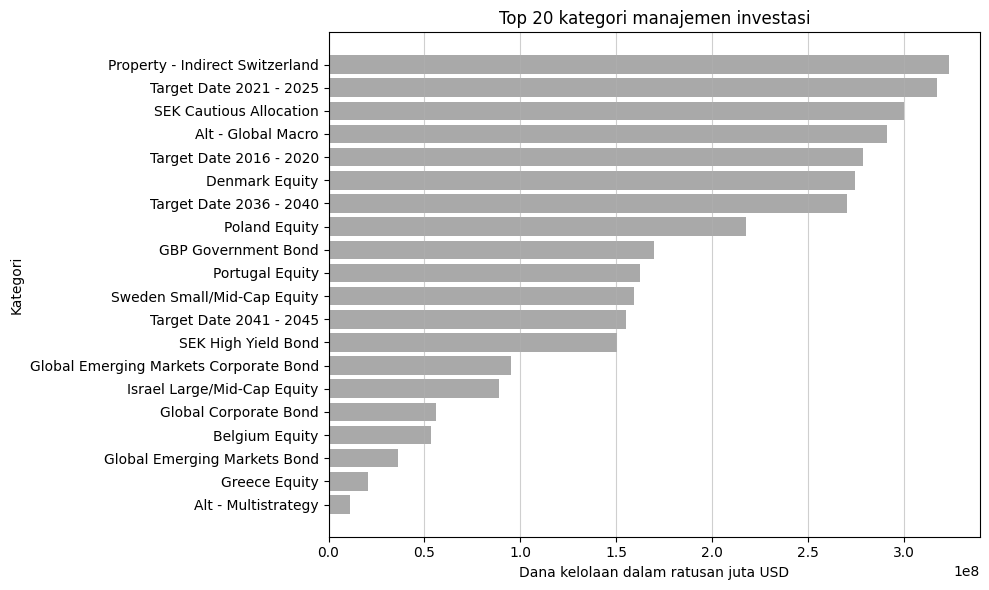

In [126]:
# Plot horizontal bar
plt.figure(figsize=(10, 6))
plt.barh(df_top20_fund_size['category'], df_top20_fund_size['fund_size_usd'], color='darkgray')
plt.xlabel('Dana kelolaan dalam ratusan juta USD')
plt.ylabel('Kategori')
plt.title('Top 20 kategori manajemen investasi')
plt.grid(axis='x', linestyle='-', alpha=0.6)
plt.tight_layout()

# Tampilkan plot
plt.show()

# 3. Hubungan antara `management fees` dengan pertumbuhan return investasi

In [127]:
fitur = ['management_fees', 'fund_return_2015', 'fund_return_2016', 'fund_return_2017', 'fund_return_2018','fund_return_2019']
df_c = df[fitur]
df_c

,management_fees,fund_return_2015,fund_return_2016,fund_return_2017,fund_return_2018,fund_return_2019
0,NaN,NaN,28.74,15.24,-11.31,18.51
1,0.75,7.12,41.98,1.74,-5.72,25.39
2,0.75,-5.99,24.70,29.12,-19.51,22.29
3,0.30,-0.80,38.64,6.13,-6.10,23.37
4,0.85,NaN,NaN,NaN,-13.60,20.20
...,...,...,...,...,...,...
22415,1.50,20.76,25.76,32.72,-14.18,21.35
22416,0.75,8.70,9.25,13.84,-15.58,26.42
22417,0.00,4.17,27.14,14.13,-4.75,23.39
22418,1.00,4.72,13.14,30.97,0.86,19.82


In [128]:
cek_null(df_c)

                  Total    Percent
fund_return_2015   6604  29.455843
fund_return_2016   4619  20.602141
fund_return_2017   2929  13.064228
fund_return_2018   1427   6.364853
fund_return_2019    867   3.867083
management_fees     784   3.496878


In [129]:
# Drop missing value
df_c.dropna(inplace=True)
cek_null(df_c)

Empty DataFrame
Columns: [Total, Percent]
Index: []


<ipython-input-129-63f73e2b696c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.dropna(inplace=True)


In [130]:
df_c.shape

(15213, 6)

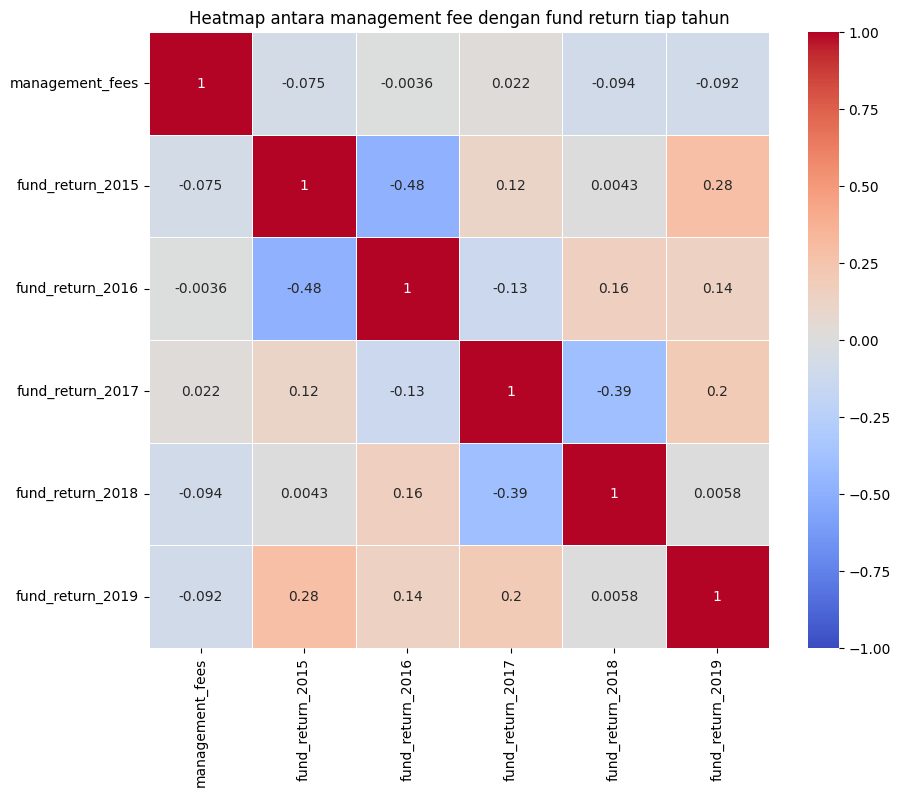

In [131]:
# Menghitung matriks korelasi
correlation_matrix = df_c.corr()

# Tentukan skala untuk legenda
vmin, vmax = -1, 1

# Membuat heatmap korelasi dengan legenda yang sesuai skala
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, xticklabels=fitur, yticklabels=fitur, vmin=vmin, vmax=vmax)
plt.title('Heatmap antara management fee dengan fund return tiap tahun')
plt.show()

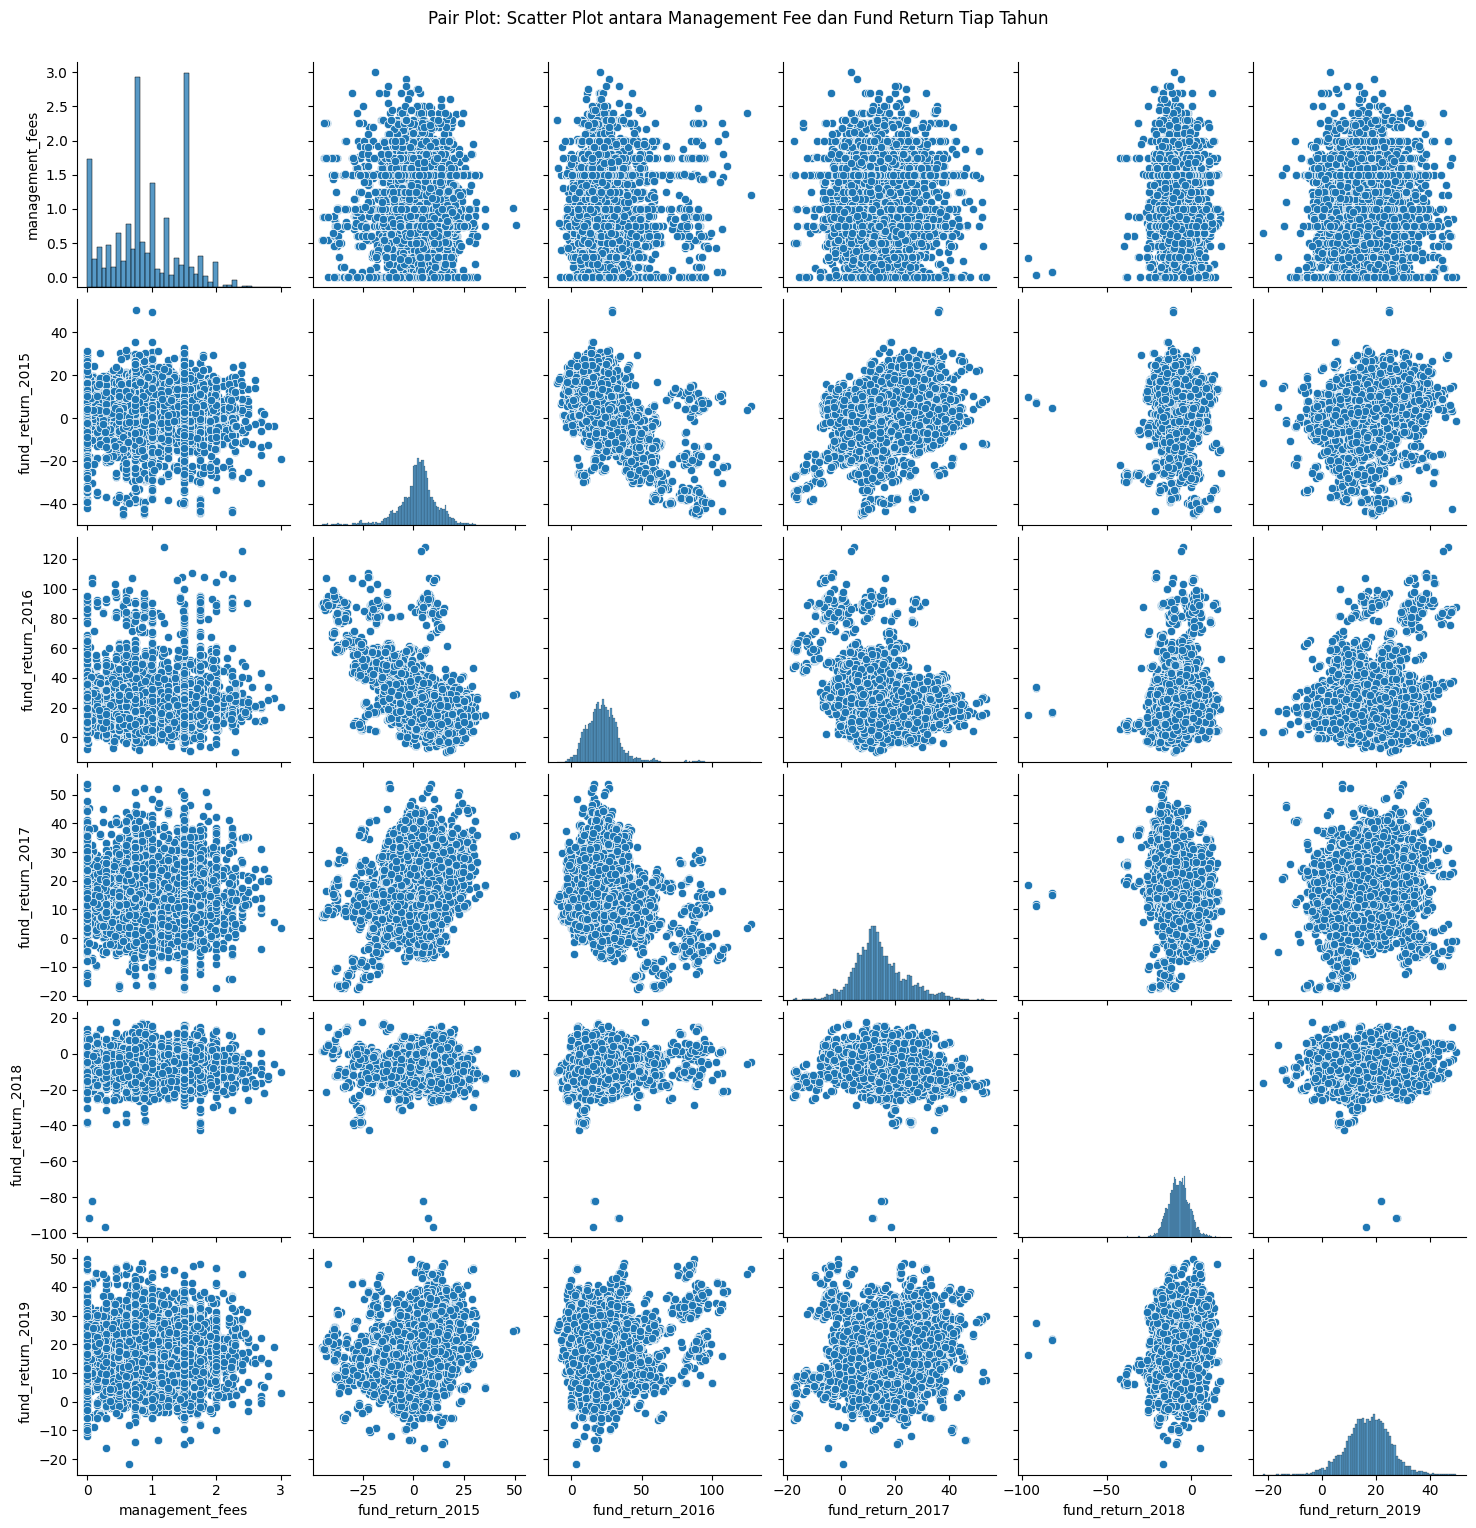

In [132]:
# Membuat pair plot untuk melihat scatter plot antara management_fee dan fund_return tiap tahunnya
pair_plot = sns.pairplot(df_c)

# Atur judul
pair_plot.fig.suptitle('Pair Plot: Scatter Plot antara Management Fee dan Fund Return Tiap Tahun', y=1.02)

# Tampilkan plot
plt.show()

In [133]:
# Karena kolom fund_return memiliki banyak missing values, maka dilakukan imputation dengan mean
df_imputed = df_c.fillna(df_c.mean())

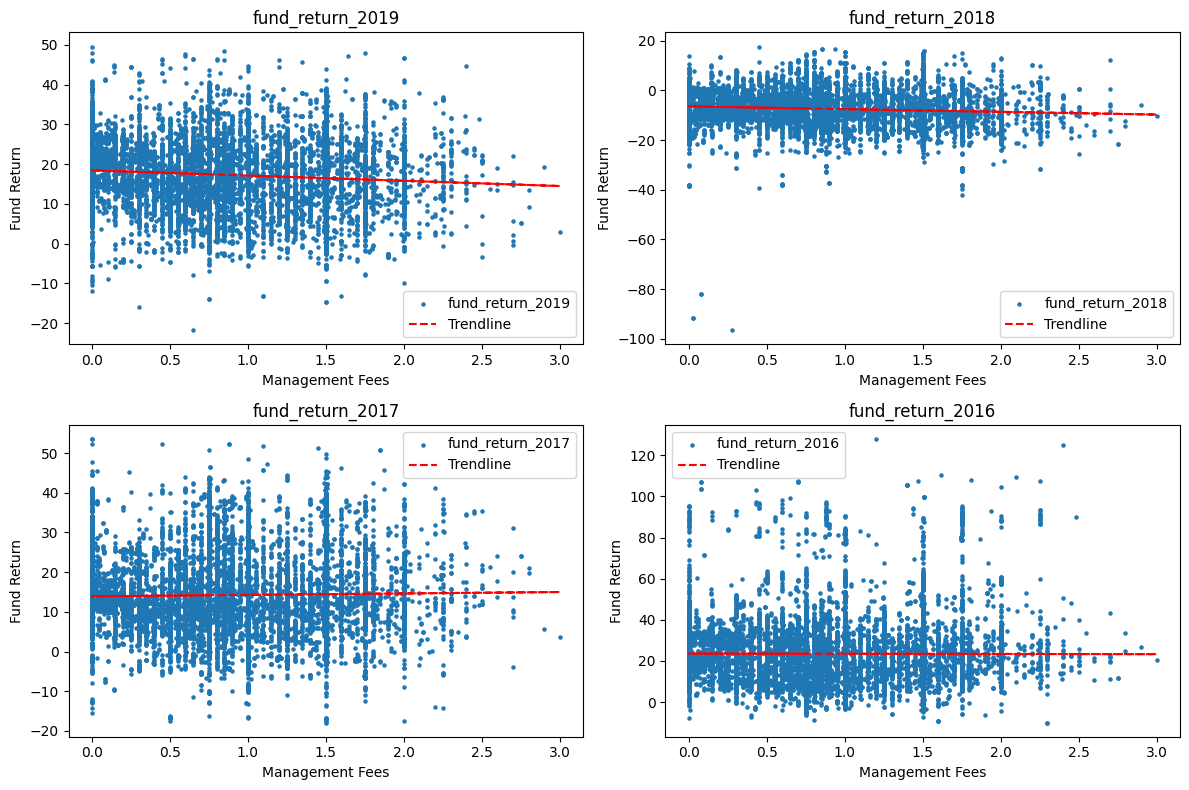

In [134]:
# Menyeleksi kolom 'management_fees' dan 'fund_return'
x = df_imputed['management_fees']
fund_return_columns = ['fund_return_2019', 'fund_return_2018', 'fund_return_2017', 'fund_return_2016']

# Membuat scatter plots dengan 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
point_size = 5

for i, year_column in enumerate(fund_return_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Cek jika terdapat empty spot
    if i >= len(fund_return_columns):
        ax.axis('off')  # Mematikan axes untuk empty plots
    else:
        ax.scatter(x, df_imputed[year_column], label=year_column, s=point_size)

        # Menambahkan trendline dan label
        z = np.polyfit(x, df_imputed[year_column], 1)
        p = np.poly1d(z)
        ax.plot(x, p(x), "r--", label="Trendline")
        ax.set_xlabel('Management Fees')
        ax.set_ylabel('Fund Return')
        ax.legend()
        ax.set_title(f'{year_column}')

plt.tight_layout()
plt.show()

# 4. Pilihan sektor investasi dari investment management berdasarkan equity_size

In [135]:
df_d = df.copy()
kolom_tujuan = "equity_size"
nilai_unik = df_d[kolom_tujuan].unique()
nilai_unik

array(['Large', 'Medium', 'Small'], dtype=object)

In [136]:
equity_size = 'equity_size'
sectors = ['sector_basic_materials','sector_consumer_cyclical', 'sector_financial_services',
             'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
             'sector_communication_services', 'sector_energy', 'sector_industrials', 'sector_technology']
df_d = df_d[sectors+[equity_size]]
df_d

,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,equity_size
0,14.17,2.35,18.69,NaN,4.31,9.30,NaN,9.28,7.74,23.95,10.21,Large
1,8.17,14.42,18.82,NaN,2.96,15.34,1.59,NaN,NaN,17.32,21.39,Medium
2,6.35,22.32,10.82,0.44,11.74,3.37,NaN,17.14,NaN,4.39,23.42,Large
3,3.01,14.47,13.86,1.73,11.37,10.43,1.39,8.46,3.27,16.32,15.68,Large
4,19.94,2.45,16.94,1.21,2.83,16.24,4.00,9.42,0.96,15.72,10.28,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
22415,3.30,19.93,16.27,0.62,3.03,11.56,0.77,8.68,3.49,21.23,11.11,Small
22416,17.64,7.35,26.02,1.00,9.48,7.32,4.14,5.98,8.44,11.84,0.79,Medium
22417,3.66,14.73,22.92,0.82,2.71,12.69,NaN,16.78,0.37,11.07,14.24,Large
22418,8.70,7.94,11.46,2.43,4.89,12.42,NaN,5.02,6.25,12.01,28.89,Small


In [137]:
# Check missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df_d)

                               Total    Percent
sector_utilities                6169  27.515611
sector_energy                   5635  25.133809
sector_real_estate              5384  24.014273
sector_basic_materials          2969  13.242640
sector_healthcare               2519  11.235504
sector_consumer_defensive       2425  10.816236
sector_communication_services   2247  10.022302
sector_technology               2121   9.460303
sector_financial_services       2073   9.246209
sector_industrials              1737   7.747547
sector_consumer_cyclical        1613   7.194469


Mengisi data null (sectors) dengan 0

Alasan: Null disini artinya investment management tidak menginvestasikan uangnya di sektor tersebut.

In [138]:
# Mengisi Missing values dengan nilai 0
df_d.fillna(0, inplace=True)
cek_null(df_d)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [139]:
df_d

,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,equity_size
0,14.17,2.35,18.69,0.00,4.31,9.30,0.00,9.28,7.74,23.95,10.21,Large
1,8.17,14.42,18.82,0.00,2.96,15.34,1.59,0.00,0.00,17.32,21.39,Medium
2,6.35,22.32,10.82,0.44,11.74,3.37,0.00,17.14,0.00,4.39,23.42,Large
3,3.01,14.47,13.86,1.73,11.37,10.43,1.39,8.46,3.27,16.32,15.68,Large
4,19.94,2.45,16.94,1.21,2.83,16.24,4.00,9.42,0.96,15.72,10.28,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
22415,3.30,19.93,16.27,0.62,3.03,11.56,0.77,8.68,3.49,21.23,11.11,Small
22416,17.64,7.35,26.02,1.00,9.48,7.32,4.14,5.98,8.44,11.84,0.79,Medium
22417,3.66,14.73,22.92,0.82,2.71,12.69,0.00,16.78,0.37,11.07,14.24,Large
22418,8.70,7.94,11.46,2.43,4.89,12.42,0.00,5.02,6.25,12.01,28.89,Small


In [140]:
# Pisahkan DataFrame berdasarkan nilai 'equity_size'
df_d_small = df_d.loc[df_d['equity_size'] == 'Small']
df_d_medium = df_d.loc[df_d['equity_size'] == 'Medium']
df_d_large = df_d.loc[df_d['equity_size'] == 'Large']


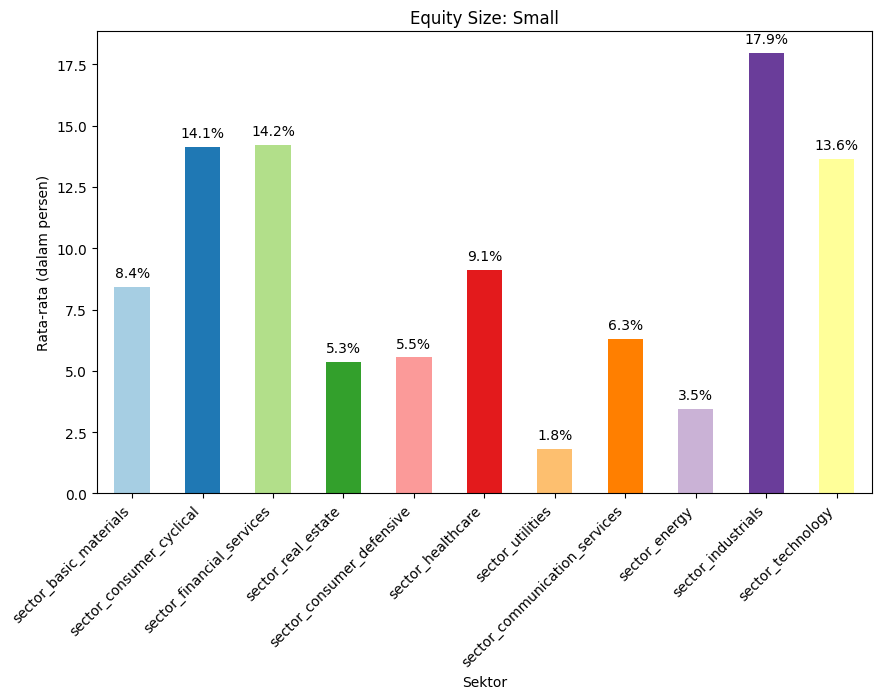

<ipython-input-157-fca91a4c118a>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sector_proportion_avg = df.mean()


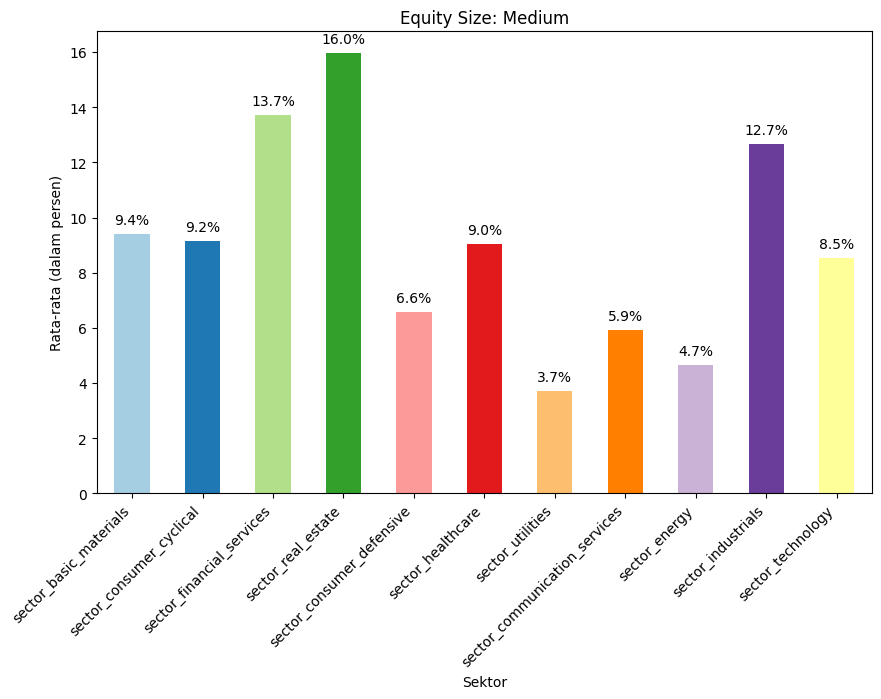

<ipython-input-157-fca91a4c118a>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sector_proportion_avg = df.mean()


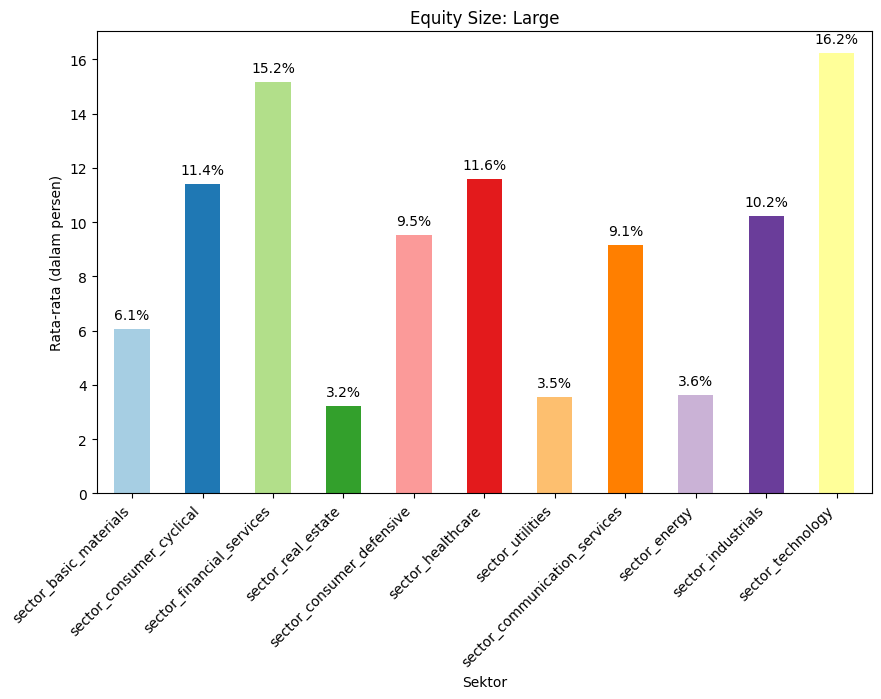

In [157]:
# Fungsi untuk membuat bar chart
def create_bar_chart(df, equity_size_value):
    # Menghitung rata-rata proporsi di setiap sektor
    sector_proportion_avg = df.mean()

    # Membuat bar chart
    ax = sector_proportion_avg.plot(kind='bar', color=plt.cm.Paired.colors, figsize=(10, 6))

    # Menambahkan label persentase di setiap batang
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    # Menambahkan label dan judul
    plt.xlabel('Sektor')
    plt.ylabel('Rata-rata (dalam persen)')
    plt.title(f'Equity Size: {equity_size_value}')

    # Memutar label di setiap tick pada sumbu x
    plt.xticks(rotation=45, ha='right')

    # Menampilkan bar chart
    plt.show()

# Membuat bar chart untuk df_d_small
create_bar_chart(df_d_small, 'Small')

# Membuat bar chart untuk df_d_medium
create_bar_chart(df_d_medium, 'Medium')

# Membuat bar chart untuk df_d_large
create_bar_chart(df_d_large, 'Large')